In [0]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from IPython.display import display 

plt.style.use('ggplot')
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving asylum_seekers.csv to asylum_seekers.csv


In [0]:
import io
seekers = pd.read_csv(io.BytesIO(uploaded['asylum_seekers.csv']))
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Fill missing values with consistent value
seekers = seekers.fillna(value = "")

In [0]:
# Replace all '*' with ''
seekers = seekers.replace(['*'], ['']) 

In [0]:
# Standardize column names
labels = ['year', 
          'country_of_residence', 
          'country_of_origin', 
          'rsd_type', 
          'total_pending_at_year_start', 
          'total_pending_year_start_UNHCR_assisted', 
          'applied_during_year',
          'decisions_recognized',
          'decisions_other', 
          'rejected',
          'otherwise_closed',
          'total_decisions',
          'total_pending_at_year_end', 
          'total_pending_year_end_UNHCR_assisted']

In [0]:
seekers.columns = labels

In [0]:
# Convert 'applied_during_year' to numeric 
seekers['applied_during_year'] = pd.to_numeric(seekers['applied_during_year'], errors='coerce')

In [0]:
# Convert all numeric columns to floats 
for col in ['total_pending_at_year_start', \
            'total_pending_year_start_UNHCR_assisted', \
            'applied_during_year', \
            'decisions_recognized', \
            'decisions_other', \
            'rejected', \
            'otherwise_closed', \
            'total_decisions', \
            'total_pending_at_year_end', \
            'total_pending_year_end_UNHCR_assisted']:
    seekers[col] = pd.to_numeric(seekers[col], errors='coerce')
    seekers[col] = seekers[col].astype('float')

In [0]:
# Format 'rsd_type' as list of strings
seekers.rsd_type = [[x[:1], x[4:]] for x in seekers.rsd_type]

In [0]:
seekers[0:5]

year  ... total_pending_year_end_UNHCR_assisted
0  2000  ...                                   0.0
1  2000  ...                                   0.0
2  2000  ...                                1235.0
3  2000  ...                                   0.0
4  2000  ...                                   0.0

[5 rows x 14 columns]

In [0]:
# Replace lengthy country names for clarity 
seekers = seekers.replace(['Syrian Arab Rep.'],['Syria'])
seekers = seekers.replace(['Dem. Rep. of the Congo'],['Congo'])
seekers = seekers.replace(['Rep. of Moldova'],['Moldova'])
seekers = seekers.replace(['Iran (Islamic Rep. of)'],['Iran'])
seekers = seekers.replace(['Venezuela (Bolivarian Republic of)'],['Venezuela'])
seekers = seekers.replace(['United States of America'],['USA'])
seekers = seekers.replace(['United Kingdom'],['UK'])


### Comparing Country of Origin Application Rate

In [0]:
# How many unique countries of residence are there?
len(seekers.country_of_residence.unique())

189

In [0]:
# How many unique countries of origin are there?
len(seekers.country_of_origin.unique())

221

In [0]:
# Filter seekers by year
seekers_2004 = seekers.query('year == 2004')
seekers_2014 = seekers.query('year == 2014')

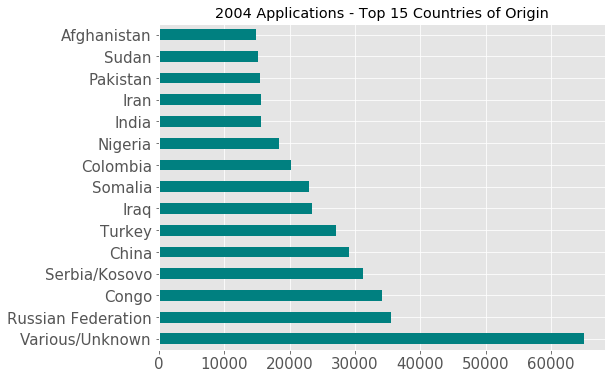

In [0]:
# Top 15 countries of origin in 2004
sums_2004 = seekers_2004.groupby(['country_of_origin'])[['applied_during_year']].aggregate('sum')
top_15_countries_of_origin_2004 = sums_2004.applied_during_year.sort_values(ascending=False)[:15]
chart_2004 = top_15_countries_of_origin_2004.plot.barh(
    figsize = [8, 6], 
    fontsize = 15,
    title = '2004 Applications - Top 15 Countries of Origin', 
    color = 'teal')
chart_2004.set_ylabel('')
chart_2004

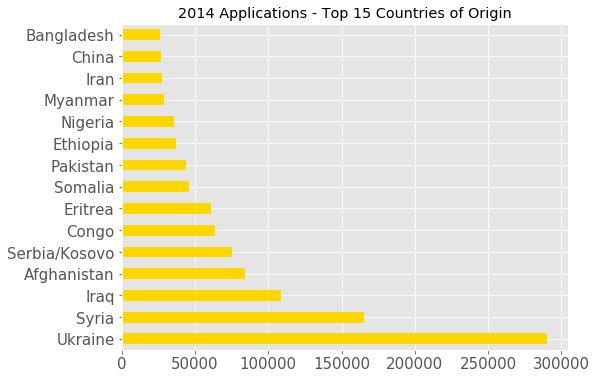

In [0]:
# Top 15 countries of origin in 2014
sums_2014 = seekers_2014.groupby(['country_of_origin'])[['applied_during_year']].aggregate('sum')
top_15_countries_of_origin_2014 = sums_2014.applied_during_year.sort_values(ascending=False)[:15]
chart_2014 = top_15_countries_of_origin_2014.plot.barh(
    figsize = [8, 6], 
    fontsize = 15, 
    title = '2014 Applications - Top 15 Countries of Origin', 
    color = 'gold')
chart_2014.set_ylabel('')
chart_2014

In [0]:
# Create Ukrainian datafame
ukrainian = seekers.query("country_of_origin == 'Ukraine'")

In [0]:
# Number of records
len(ukrainian)

1205

In [0]:
# Number of countries of residence
len(ukrainian.country_of_residence.unique())

91

Text(0.5, 1.0, 'Top 15 Countries of Residence for Ukrainian Refugees')

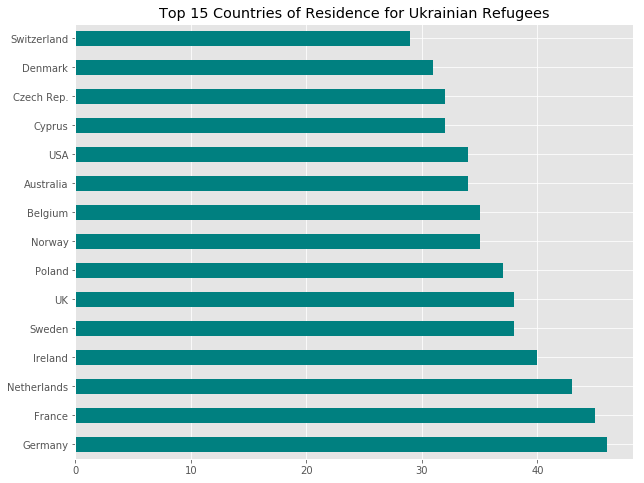

In [0]:
country_counts = ukrainian['country_of_residence'].value_counts()
top_15_countries_of_residence = country_counts.sort_values(ascending=False)[:15]
top_15 = top_15_countries_of_residence.plot.barh(figsize =(10,8),color = 'teal')
top_15.set_title('Top 15 Countries of Residence for Ukrainian Refugees')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving time_series.csv to time_series.csv


In [0]:
import io
resettlement = pd.read_csv(io.BytesIO(uploaded['time_series.csv']))
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
labels1 = ['year', 
          'country_of_residence', 
          'country_of_origin', 
          'population_type',
          'population_count']

In [0]:
resettlement.columns = labels1

In [0]:
ukrainian_resettlement = resettlement.query("country_of_origin == 'Ukraine'")

In [0]:
def select_country(country):
    return ukrainian_resettlement.query("country_of_residence == {} and population_type == 'Asylum-seekers'").format(country)

In [0]:
germany = ukrainian_resettlement.query("country_of_residence == 'Germany' and population_type == 'Asylum-seekers'")
france = ukrainian_resettlement.query("country_of_residence == 'France' and population_type == 'Asylum-seekers'")
netherlands = ukrainian_resettlement.query("country_of_residence == 'Netherlands' and population_type == 'Asylum-seekers'")
sweden = ukrainian_resettlement.query("country_of_residence == 'Poland' and population_type == 'Asylum-seekers'")
russia = ukrainian_resettlement.query("country_of_residence == 'Russian Federation' and population_type == 'Asylum-seekers'")
canada = ukrainian_resettlement.query("country_of_residence == 'Canada' and population_type == 'Asylum-seekers'")
poland = ukrainian_resettlement.query("country_of_residence == 'France' and population_type == 'Asylum-seekers'")
norway = ukrainian_resettlement.query("country_of_residence == 'Norway' and population_type == 'Asylum-seekers'")
unitedstatesofamerica = ukrainian_resettlement.query("country_of_residence == 'United States of America' and population_type == 'Asylum-seekers'")
cyprus = ukrainian_resettlement.query("country_of_residence == 'Cyprus' and population_type == 'Asylum-seekers'")
czechrep = ukrainian_resettlement.query("country_of_residence == 'Czech.Rep' and population_type == 'Asylum-seekers'")


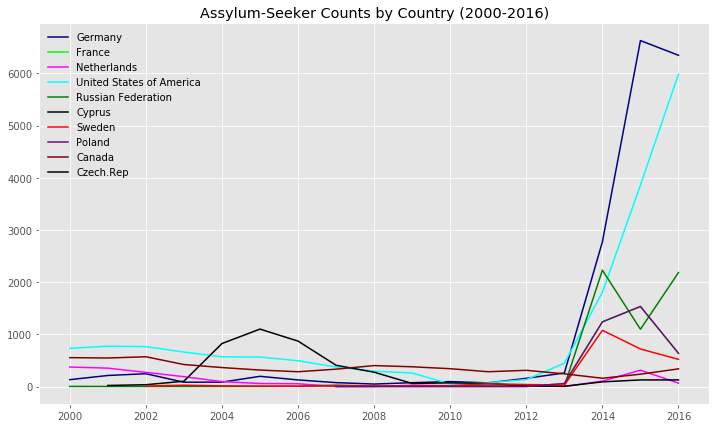

In [0]:
fig = plt.figure(figsize=(12,7))
ax = plt.axes()

plt.plot(germany.year, germany.population_count, label = 'Germany', color = 'navy')
plt.plot(france.year, france.population_count, label = 'France', color = 'lime')
plt.plot(netherlands.year, netherlands.population_count, label = 'Netherlands', color = 'magenta')
plt.plot(unitedstatesofamerica.year, unitedstatesofamerica.population_count, label = 'United States of America', color = 'cyan')
plt.plot(russia.year, russia.population_count, label = 'Russian Federation', color = 'green')
plt.plot(cyprus.year, cyprus.population_count, label = 'Cyprus', color = 'black')
plt.plot(sweden.year, sweden.population_count, label = 'Sweden', color = 'red')
plt.plot(poland.year, poland.population_count, label = 'Poland', color = 'purple')
plt.plot(canada.year, canada.population_count, label = 'Canada', color = 'maroon')
plt.plot(czechrep.year, czechrep.population_count, label = 'Czech.Rep', color = 'black')



plt.title("Asylum-Seeker Counts by Country (2000-2016)")
ax.legend(frameon=False)

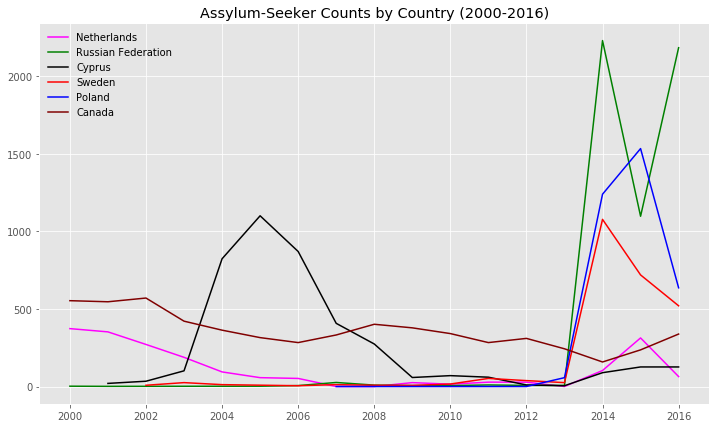

In [0]:
fig = plt.figure(figsize=(12,7))
ax = plt.axes()

plt.plot(netherlands.year, netherlands.population_count, label = 'Netherlands', color = 'magenta')
plt.plot(russia.year, russia.population_count, label = 'Russian Federation', color = 'green')
plt.plot(cyprus.year, cyprus.population_count, label = 'Cyprus', color = 'black')
plt.plot(sweden.year, sweden.population_count, label = 'Sweden', color = 'red')
plt.plot(poland.year, poland.population_count, label = 'Poland', color = 'blue')
plt.plot(canada.year, canada.population_count, label = 'Canada', color = 'maroon')


plt.title("Asylum-Seeker Counts by Country (2000-2016)")
ax.legend(frameon=False)